Exploratory analysis

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [142]:
df = pd.read_csv('mbti.csv')
df = pd.DataFrame(data= df)


In [143]:
#print(df.head())
print(df['type'][0])

INFJ


<AxesSubplot:>

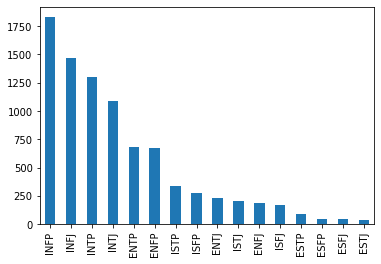

In [144]:
li = df.type.value_counts()
#print(li)
li.plot(kind='bar', stacked=True)

[[6676, 1999], [7478, 1197], [3981, 4694], [3434, 5241]]


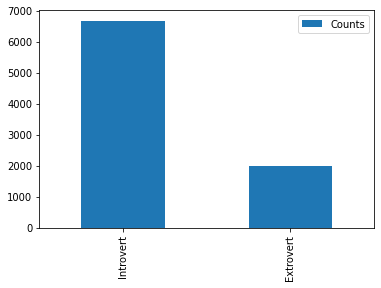

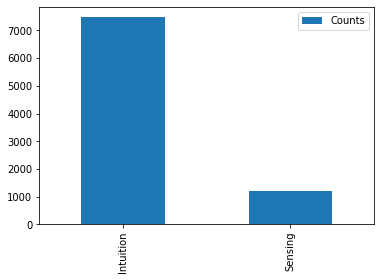

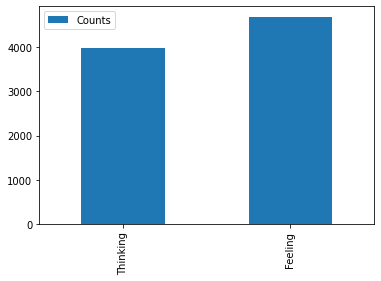

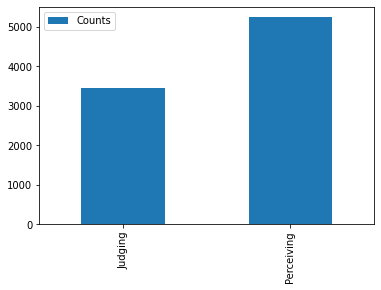

            Counts
Judging       3434
Perceiving    5241


In [145]:
li = df.type
counts =[ [0,0],[0,0],[0,0],[0,0] ]
#fig,axs = plt.subplots(2,4)

for i in li:
    if (i[0]=="I"):
        counts[0][0]+=1
    elif (i[0]=="E"):
        counts[0][1]+=1
    if (i[1]=="N"):
        counts[1][0]+=1
    elif (i[1]=="S"):
        counts[1][1]+=1
    if (i[2]=="T"):
        counts[2][0]+=1
    elif (i[2]=="F"):
        counts[2][1]+=1
    if (i[3]=="J"):
        counts[3][0]+=1
    elif (i[3]=="P"):
        counts[3][1]+=1
print(counts)

temp_df = pd.DataFrame({'Counts':counts[0]},index=['Introvert','Extrovert'])
temp_df.plot(kind='bar')
plt.show()
temp_df = pd.DataFrame({'Counts':counts[1]},index=['Intuition','Sensing'])
temp_df.plot(kind='bar')
plt.show()
temp_df = pd.DataFrame({'Counts':counts[2]},index=['Thinking','Feeling'])
temp_df.plot(kind='bar')
plt.show()
temp_df = pd.DataFrame({'Counts':counts[3]},index=['Judging','Perceiving'])
temp_df.plot(kind='bar')
plt.show()
    
    

print(temp_df)


    

In [146]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [147]:
stop_words = stopwords.words('english')
extra_words = ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp','istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj',"url"]
for i in extra_words:
    stop_words.append(i)
#print(stop_words)
#newD = " ".join()

#newD = " ".join(i.lower() for i in word_tokenize(df['posts'][0]) if i.lower() not in stop_words and len(i)>2) # removing stopwords 
#pattern = r'[0-9]'
#newD = re.sub(pattern, '', newD)# removing numbers
#tokenizer = RegexpTokenizer(r'\w+')
#newD = " ".join(i for i in tokenizer.tokenize(newD))
#newD = newD.translate(string.punctuation)
#print(newD)



In [148]:
print(df['posts'][1])

'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f9da6

In [191]:
#cleaning here
for i in range(len(df.type)):
    df['posts'][i] = df['posts'][i].replace('|||'," ")
    df['posts'][i] = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'url ', df['posts'][i], flags=re.MULTILINE)

    tokenizer = RegexpTokenizer(r'\w+')
    newD = " ".join(i for i in tokenizer.tokenize(df['posts'][i]))
    pattern = r'[0-9]'
    newD = re.sub(pattern, '', newD)# removing numbers
    newD = " ".join(i.lower() for i in word_tokenize(newD) if i.lower() not in stop_words and len(i)>2) # removing stopwords 
    df['posts'][i] = newD
    if ( (i%int( len(df.type)/100 ) ) == 0):
        print(i/int( len(df.type)/100 ) )
    


0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0


In [190]:
print(int(len(df.type)/100))

86


In [153]:
print(df['posts'][12])

joe santagato sure type yet know heavy make want violently bang head wall lol know naturally helplessly feel compassion yeah according book ixtp could relate movie character lot coming world prominent becoming incredibly self conscious feeling like weakest tris shailene woodleys characters infx four macklemore lookalike christina esxp kate winslets character never read books music infx watching one interview gon assume see eyes cressida comes across hence bohemian clothing seen multiple music festival love scrunchies lol harry chelsy davy maybe guess hard time taking fact year old mind year old living school work conditions year old call bitch know wanted traits non judgemental understanding smart modest independent logical turn traits insecurity immature jealousy let say emotionally mentally mature would expect something year olds faith get day user understand sympathize necessarily agree find annoying people put emotions first insensitive towards peoples emotions never saw daddy issu

In [192]:
#print(df['posts'][0])
#temp = df['posts'][1]
#print("\n")
ps = PorterStemmer()
lm = WordNetLemmatizer()
#temp = ' '.join( ps.stem(i) for i in tokenizer.tokenize(temp))
#temp = ' '.join( lm.lemmatize(i) for i in tokenizer.tokenize(temp))



def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map( lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        #print(tag)
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lm.lemmatize(word, tag))
    return " ".join(i for i in lemmatized_sentence)

#temp2 = lemmatize_sentence("playing player players")
#print(temp2)

#temp = lemmatize_sentence(temp)
#print(temp)

for i in range(len(df.type)):
    df['posts'][i] = lemmatize_sentence(df['posts'][i])
    if ( (i%int( len(df.type)/100 ) ) == 0):
        print(i/int( len(df.type)/100 ) )

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0


In [202]:
allWords = ""
for i in range(len(df.type) ):
    allWords = " ".join(post for post in df['posts'])

allWords = allWords.split(" ")
hist = FreqDist(allWords)


In [203]:
print(df['posts'][0])
print(allWords)

ee', 'alot', 'description', 'three', 'type', 'though', 'mainly', 'thanks', 'post', 'mbti', 'tell', 'preference', 'baseline', 'behaviour', 'generally', 'act', 'think', 'way', 'therefore', 'classify', 'mean', 'step', 'zone', 'talk', 'alot', 'already', 'know', 'gon', 'say', 'bother', 'listen', 'talk', 'zone', 'pretty', 'much', 'anywhere', 'though', 'likely', 'around', 'people', 'relate', 'lot', 'woah', 'look', 'amazing', 'moment', 'usually', 'happen', 'ive', 'think', 'heavily', 'something', 'look', 'notice', 'cloud', 'sound', 'much', 'like', 'step', 'mother', 'sister', 'law', 'would', 'incline', 'say', 'cant', 'say', 'ennegram', 'though', 'still', 'dont', 'know', 'much', 'nice', 'west', 'nile', 'virus', 'feel', 'quite', 'comfortable', 'answer', 'sort', 'question', 'public', 'forum', 'especially', 'one', 'meant', 'witness', 'would', 'see', 'one', 'else', 'replied', 'yet', 'say', 'do', 'would', 'probably', 'good', 'idea', 'look', 'function', 'site', 'subforum', 'dedicate', 'yea', 'pretty', 

<AxesSubplot:>

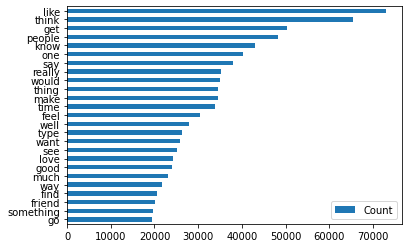

In [210]:
hist_df = pd.DataFrame({"Count":list(hist.values())},index = list(hist.keys()))
hist_df = hist_df.nlargest(columns="Count", n = 25)
hist_df.sort_values('Count', inplace = True)
hist_df.plot.barh()

In [291]:
cv = CountVectorizer(max_features=5000)

doc = []
for i in range(len(df['posts'])):
    doc.append(df['posts'][i])

print(len(doc),"Should be 8000ish")
matrix = cv.fit_transform(doc)
print(matrix.toarray())

8675 Should be 8000ish
[[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 2 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [292]:
print(matrix.shape)

(8675, 5000)


In [293]:
y1 = df['type']
print(y1.head(100))
print(y1[7])

0     INFJ
1     ENTP
2     INTP
3     INTJ
4     ENTJ
      ... 
95    INFP
96    INFJ
97    INTJ
98    INFJ
99    ENFP
Name: type, Length: 100, dtype: object
INTJ


In [294]:
y1_train=[]
y2_train =[]
y3_train = []
y4_train = []
for i in range(len(df['type'])):
    if df['type'][i][0] == 'I':
        y1_train.append(0)
    elif df['type'][i][0] == 'E':
        y1_train.append(1)
    if df['type'][i][1] == 'N':
        y2_train.append(0)
    elif df['type'][i][1] == 'S':
        y2_train.append(1)
    if df['type'][i][2] == 'T':
        y3_train.append(0)
    elif df['type'][i][2] == 'F':
        y3_train.append(1)
    if df['type'][i][3] == 'J':
        y4_train.append(0)
    elif df['type'][i][3] == 'P':
        y4_train.append(1)

print(len(y1_train))
print(len(y2_train))
print(len(y3_train))
print(len(y4_train))

8675
8675
8675
8675


In [295]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(matrix,y1_train,test_size=0.33,random_state=42)


In [296]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100),max_iter=200,verbose=True)
mlp.fit(X1_train,Y1_train)

Iteration 1, loss = 0.53699075
Iteration 2, loss = 0.39837728
Iteration 3, loss = 0.27172287
Iteration 4, loss = 0.15840148
Iteration 5, loss = 0.07704563
Iteration 6, loss = 0.02895626
Iteration 7, loss = 0.01070070
Iteration 8, loss = 0.00484600
Iteration 9, loss = 0.00298297
Iteration 10, loss = 0.00203571
Iteration 11, loss = 0.00141289
Iteration 12, loss = 0.00104048
Iteration 13, loss = 0.00078845
Iteration 14, loss = 0.00061889
Iteration 15, loss = 0.00049942
Iteration 16, loss = 0.00041810
Iteration 17, loss = 0.00035970
Iteration 18, loss = 0.00031601
Iteration 19, loss = 0.00028533
Iteration 20, loss = 0.00026122
Iteration 21, loss = 0.00024353
Iteration 22, loss = 0.00022783
Iteration 23, loss = 0.00021639
Iteration 24, loss = 0.00020616
Iteration 25, loss = 0.00019718
Iteration 26, loss = 0.00019019
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(100, 100), verbose=True)

In [297]:
pred_train = mlp.predict(X1_train)
pred_test = mlp.predict(X1_test)
accuTrain = accuracy_score(pred_train,Y1_train)
accuTest = accuracy_score(pred_test,Y1_test)
print("I-E")
print("Traning accu ",accuTrain)
print("Testing accu",accuTest)

I-E
Traning accu  1.0
Testing accu 0.7813482361159623


In [298]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(matrix,y2_train,test_size=0.33,random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes = (100),max_iter=200,verbose=True)
mlp2.fit(X1_train,Y1_train)
pred_train = mlp2.predict(X1_train)
pred_test = mlp2.predict(X1_test)
accuTrain = accuracy_score(pred_train,Y1_train)
accuTest = accuracy_score(pred_test,Y1_test)
print("N-S")
print("Traning accu",accuTrain)
print("Testing accu",accuTest)

Iteration 1, loss = 0.42076173
Iteration 2, loss = 0.28505580
Iteration 3, loss = 0.19979801
Iteration 4, loss = 0.12921455
Iteration 5, loss = 0.08129145
Iteration 6, loss = 0.05323566
Iteration 7, loss = 0.03582745
Iteration 8, loss = 0.02314935
Iteration 9, loss = 0.01532206
Iteration 10, loss = 0.01109800
Iteration 11, loss = 0.00830984
Iteration 12, loss = 0.00680188
Iteration 13, loss = 0.00560141
Iteration 14, loss = 0.00465773
Iteration 15, loss = 0.00397214
Iteration 16, loss = 0.00339823
Iteration 17, loss = 0.00296425
Iteration 18, loss = 0.00264016
Iteration 19, loss = 0.00234865
Iteration 20, loss = 0.00209831
Iteration 21, loss = 0.00190202
Iteration 22, loss = 0.00172845
Iteration 23, loss = 0.00158733
Iteration 24, loss = 0.00145290
Iteration 25, loss = 0.00134560
Iteration 26, loss = 0.00125411
Iteration 27, loss = 0.00117007
Iteration 28, loss = 0.00109943
Iteration 29, loss = 0.00103407
Iteration 30, loss = 0.00098242
Iteration 31, loss = 0.00092745
Iteration 32, los

In [299]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(matrix,y3_train,test_size=0.33,random_state=42)
mlp3 = MLPClassifier(hidden_layer_sizes = (100),max_iter=200,verbose=True)
mlp3.fit(X1_train,Y1_train)
pred_train = mlp3.predict(X1_train)
pred_test = mlp3.predict(X1_test)
accuTrain = accuracy_score(pred_train,Y1_train)
accuTest = accuracy_score(pred_test,Y1_test)
print("T-F")
print("Traning accu",accuTrain)
print("Testing accu",accuTest)

Iteration 1, loss = 0.54787331
Iteration 2, loss = 0.31219986
Iteration 3, loss = 0.21896017
Iteration 4, loss = 0.15225711
Iteration 5, loss = 0.13571800
Iteration 6, loss = 0.07859834
Iteration 7, loss = 0.05004396
Iteration 8, loss = 0.03059713
Iteration 9, loss = 0.02134106
Iteration 10, loss = 0.01570180
Iteration 11, loss = 0.01222921
Iteration 12, loss = 0.00973749
Iteration 13, loss = 0.00765304
Iteration 14, loss = 0.00635053
Iteration 15, loss = 0.00526108
Iteration 16, loss = 0.00453790
Iteration 17, loss = 0.00384306
Iteration 18, loss = 0.00334934
Iteration 19, loss = 0.00291901
Iteration 20, loss = 0.00259680
Iteration 21, loss = 0.00230925
Iteration 22, loss = 0.00207660
Iteration 23, loss = 0.00188137
Iteration 24, loss = 0.00172769
Iteration 25, loss = 0.00156859
Iteration 26, loss = 0.00144159
Iteration 27, loss = 0.00133286
Iteration 28, loss = 0.00124859
Iteration 29, loss = 0.00116386
Iteration 30, loss = 0.00109062
Iteration 31, loss = 0.00102698
Iteration 32, los

In [300]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(matrix,y4_train,test_size=0.33,random_state=42)
mlp4 = MLPClassifier(hidden_layer_sizes = (100),max_iter=200,verbose=True)
mlp4.fit(X1_train,Y1_train)
pred_train = mlp4.predict(X1_train)
pred_test = mlp4.predict(X1_test)
accuTrain = accuracy_score(pred_train,Y1_train)
accuTest = accuracy_score(pred_test,Y1_test)
print("J-P")
print("Traning accu",accuTrain)
print("Testing accu",accuTest)

Iteration 1, loss = 0.66980655
Iteration 2, loss = 0.47165534
Iteration 3, loss = 0.34381520
Iteration 4, loss = 0.23875533
Iteration 5, loss = 0.16893165
Iteration 6, loss = 0.11962189
Iteration 7, loss = 0.06779791
Iteration 8, loss = 0.04229904
Iteration 9, loss = 0.03008537
Iteration 10, loss = 0.02131482
Iteration 11, loss = 0.01646678
Iteration 12, loss = 0.01370267
Iteration 13, loss = 0.01047864
Iteration 14, loss = 0.00841870
Iteration 15, loss = 0.00707927
Iteration 16, loss = 0.00596783
Iteration 17, loss = 0.00518929
Iteration 18, loss = 0.00458810
Iteration 19, loss = 0.00401828
Iteration 20, loss = 0.00357369
Iteration 21, loss = 0.00322267
Iteration 22, loss = 0.00289423
Iteration 23, loss = 0.00262823
Iteration 24, loss = 0.00240320
Iteration 25, loss = 0.00221694
Iteration 26, loss = 0.00205194
Iteration 27, loss = 0.00190175
Iteration 28, loss = 0.00177514
Iteration 29, loss = 0.00165752
Iteration 30, loss = 0.00155480
Iteration 31, loss = 0.00145933
Iteration 32, los

In [303]:
SVMModel = make_pipeline(StandardScaler(with_mean=False),SVC(gamma='auto',verbose=True,max_iter=200))
SVMModel.fit(X1_train,Y1_train)

pred_train = SVMModel.predict(X1_train)
pred_test = SVMModel.predict(X1_test)
accuTrain = accuracy_score(pred_train,Y1_train)
accuTest = accuracy_score(pred_test,Y1_test)
print("J-P")
print("Traning accu",accuTrain)
print("Testing accu",accuTest)



[LibSVM]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
J-P
Traning accu 0.6075361321403991
Testing accu 0.5358016067062522


In [306]:
txt = "My name is Chetna Gupta. Currently I am pursuing my MBA from Delhi School of Management DT. I've done my B tech in it from Jaypee Institute of Technology, Noida. During my final year I worked on Clickstream analysis of your data set. In Btech and expect paste and sentimental analysis of restaurants. Reviews of Zomato which will help you Sir better understand a particular restaurants on basis of aspects like food, ambience etc. The work was also published in IEEE under the guidance of a mental. I've. Worked in IT industry and have more than 2 years of experience in this field. I was in a healthcare project name tell it and was. And was working on several tools. One tool was a physician portal tool in which physicians can look for details under them. It was designed on Dot net fix. Dot net frame book and one tool was a bed allotment tool drag bed which we used to call him and it used to look for how many beds are vacant in a particular hospital, then how many needs to be which bed need service and. Which is empty and which is occupied. It used to show all the features in a dashboard form. And my work mainly was handling database operations using Ms Equal like request of various Tenet. Officials came regarding filling of pad or certain, so we used to. Run queries on Ms equal to. Make it. Look functional on the 2 laws regarding the status of the live status and all. I love analysing data and working on using a various statistically operations. I am doing the masters in business administration to gain more knowledge regarding information systems management. It has given me inside to understand the industry from financial, operational and marketing perspective also. I have also done certain online certifications for data science and analysis using sequel, Python, Excel etc. In future I see myself working on her position of a decision maker in a big organization. And. I would. Oh also. Like to explore more in the field of data sites. Wyles by studying different models, so that's all for my side. Thank you."

doc2 = doc
doc2.append(txt)
print(doc2[len(doc2)-1])
#print(len(doc),"Should be 8000ish")
matrix2 = cv.fit_transform(doc2).toarray()





My name is Chetna Gupta. Currently I am pursuing my MBA from Delhi School of Management DT. I've done my B tech in it from Jaypee Institute of Technology, Noida. During my final year I worked on Clickstream analysis of your data set. In Btech and expect paste and sentimental analysis of restaurants. Reviews of Zomato which will help you Sir better understand a particular restaurants on basis of aspects like food, ambience etc. The work was also published in IEEE under the guidance of a mental. I've. Worked in IT industry and have more than 2 years of experience in this field. I was in a healthcare project name tell it and was. And was working on several tools. One tool was a physician portal tool in which physicians can look for details under them. It was designed on Dot net fix. Dot net frame book and one tool was a bed allotment tool drag bed which we used to call him and it used to look for how many beds are vacant in a particular hospital, then how many needs to be which bed need s

In [312]:
count = 0
print(matrix2[len(matrix2)-1].shape)
test = matrix2[len(matrix2)-1]
test=test.reshape(1,len(test))
print(test.shape)

(5000,)
(1, 5000)


In [316]:
p1 = mlp.predict(test)
p2=mlp2.predict(test)
p3=mlp3.predict(test)
p4=mlp4.predict(test)
ans =  ""
if p1 == 0:
    ans+='I'
elif p1 == 1:
    ans+='E'
if p2 == 0:
    ans+='N'
elif p2 == 1:
    ans+='S'
if p3 == 0:
    ans+='T'
elif p3 == 1:
    ans+='F'
if p4 == 0:
    ans+='J'
elif p4 == 1:
    ans+='p'

print(ans)

INTJ
